# Данные по инсультам

Выводим информацию о датасете:

In [352]:
import pandas as pd

df = pd.read_csv("..//..//static//csv//healthcare-dataset-stroke-data.csv")

df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

Атрибуты: 
* id – уникальный идентификатор пациента;
* gender – пол пациента: может быть "Male" (мужчина), "Female" (женщина) или "Other" (другой);
* age – возраст пациента (в годах);
* hypertension – наличие гипертонии: 0 – гипертонии нет, 1 – гипертония есть;
* heart_disease – наличие сердечных заболеваний: 0 – заболеваний нет, 1 – заболевание присутствует;
* ever_married – семейный статус пациента: "No" (не состоял в браке) или "Yes" (состоял в браке);
* work_type – тип занятости пациента: "children" (дети), "Govt_job" (государственная служба), "Never_worked" (никогда не работал), "Private"     (частная компания) или "Self-employed" (самозанятый);
* Residence_type – место проживания пациента: "Rural" (сельская местность) или "Urban" (город);
* avg_glucose_level – средний уровень глюкозы в крови (в ммоль/л);
* bmi – индекс массы тела пациента;
* smoking_status – статус курения пациента: "formerly smoked" (курил ранее), "never smoked" (никогда не курил), "smokes" (курит), "Unknown" (информация недоступна);
* stroke – факт наличия инсульта: 1 – пациент перенес инсульт, 0 – инсульта не было.

Бизнес-цель: кластеризация пациентов для выявления групп с схожими характеристиками здоровья и рисками инсульта. Что, к примеру, может использоваться для следующего:
* Определение групп пациентов для целенаправленных профилактических мероприятий.
* Оптимизация распределения медицинских ресурсов и создания индивидуализированных программ наблюдения.

Для начала избавимся от пустых значений:

In [353]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

bmi процент пустых значений: %3.93


In [354]:
# Замена значений
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

### Визуализация взаимосвязей

Для визуализации и выполнения задачи в целом были выбраны столбцы age, avg_glucose_level, bmi, hypertension.

In [355]:
from typing import Any, List
import matplotlib.pyplot as plt

def draw_data_2d(
    df: pd.DataFrame,
    col1: int,
    col2: int,
    y: List | None = None,
    classes: List | None = None,
    subplot: Any | None = None,
):
    ax = None
    if subplot is None:
        _, ax = plt.subplots()
    else:
        ax = subplot
    scatter = ax.scatter(df[df.columns[col1]], df[df.columns[col2]], c=y)
    ax.set(xlabel=df.columns[col1], ylabel=df.columns[col2])
    if classes is not None:
        ax.legend(
            scatter.legend_elements()[0], classes, loc="lower right", title="Classes"
        )

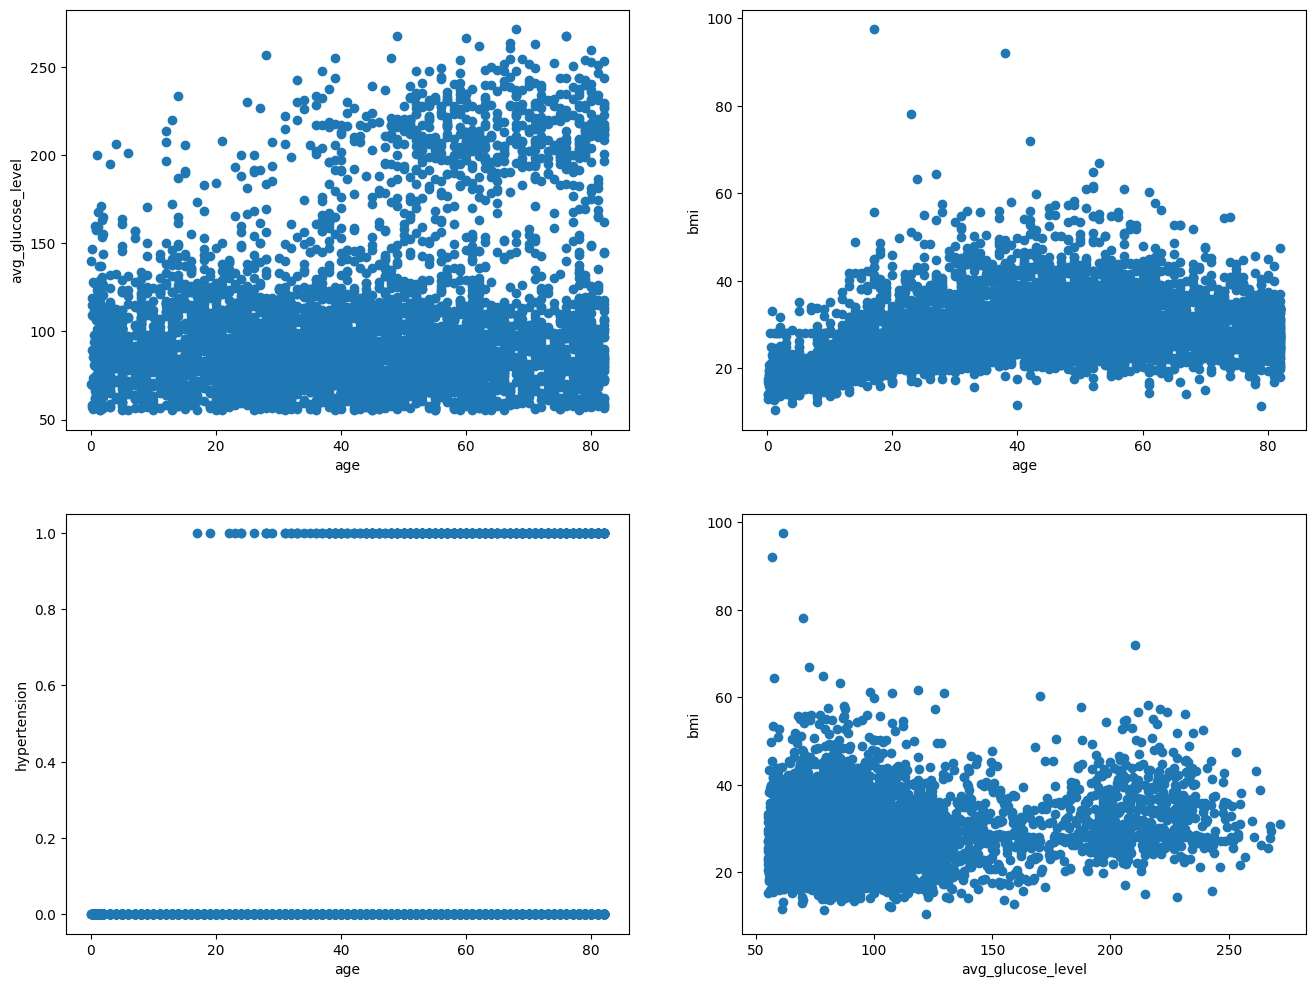

In [356]:
columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension']
df_reduced = df[columns]

plt.figure(figsize=(16, 12))

draw_data_2d(df_reduced, 0, 1, subplot=plt.subplot(2, 2, 1))  # age vs avg_glucose_level
draw_data_2d(df_reduced, 0, 2, subplot=plt.subplot(2, 2, 2))  # age vs bmi
draw_data_2d(df_reduced, 0, 3, subplot=plt.subplot(2, 2, 3))  # age vs hypertension
draw_data_2d(df_reduced, 1, 2, subplot=plt.subplot(2, 2, 4))  # avg_glucose_level vs bmi

Перед кластеризацией стандартизируем данные:

In [357]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df_reduced.drop(columns=["hypertension"]).columns
columns_to_keep = ["hypertension"]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_reduced[columns_to_scale])

df_scaled = pd.DataFrame(data_scaled, columns=columns_to_scale, index=df_reduced.index)

df_scaled[columns_to_keep] = df_reduced[columns_to_keep]

### Иерархическая агломеративная кластеризация

Также выведем дендрограмму

In [358]:
import numpy as np
from sklearn import cluster
from scipy.cluster import hierarchy

def run_agglomerative(
    df: pd.DataFrame, num_clusters: int | None = 2
) -> cluster.AgglomerativeClustering:
    agglomerative = cluster.AgglomerativeClustering(
        n_clusters=num_clusters,
        compute_distances=True,
    )
    return agglomerative.fit(df)


def get_linkage_matrix(model: cluster.AgglomerativeClustering) -> np.ndarray:
    counts = np.zeros(model.children_.shape[0])  # type: ignore
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):  # type: ignore
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([model.children_, model.distances_, counts]).astype(float)

def draw_dendrogram(linkage_matrix: np.ndarray):
    hierarchy.dendrogram(linkage_matrix, truncate_mode="level", p=3)
    plt.xticks(fontsize=10, rotation=45)
    plt.tight_layout()

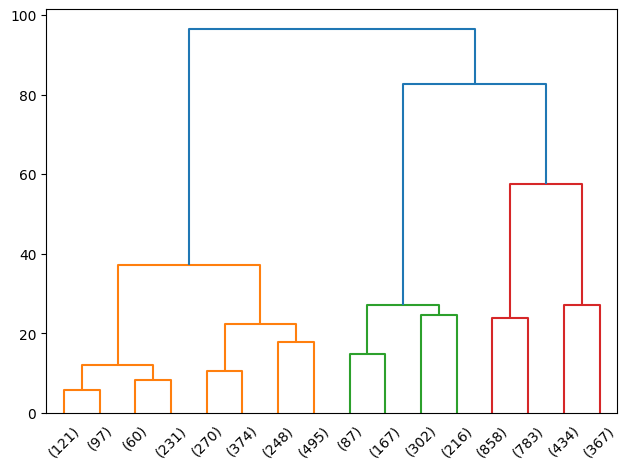

In [359]:
tree = run_agglomerative(df_scaled)
linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

Попробуем разделить данные на 2 больших кластера, поэтому зададим порог расстояния в 90 единиц.

И визуализируем сами результаты иерархической кластеризации, т.е. распределение кластеров:

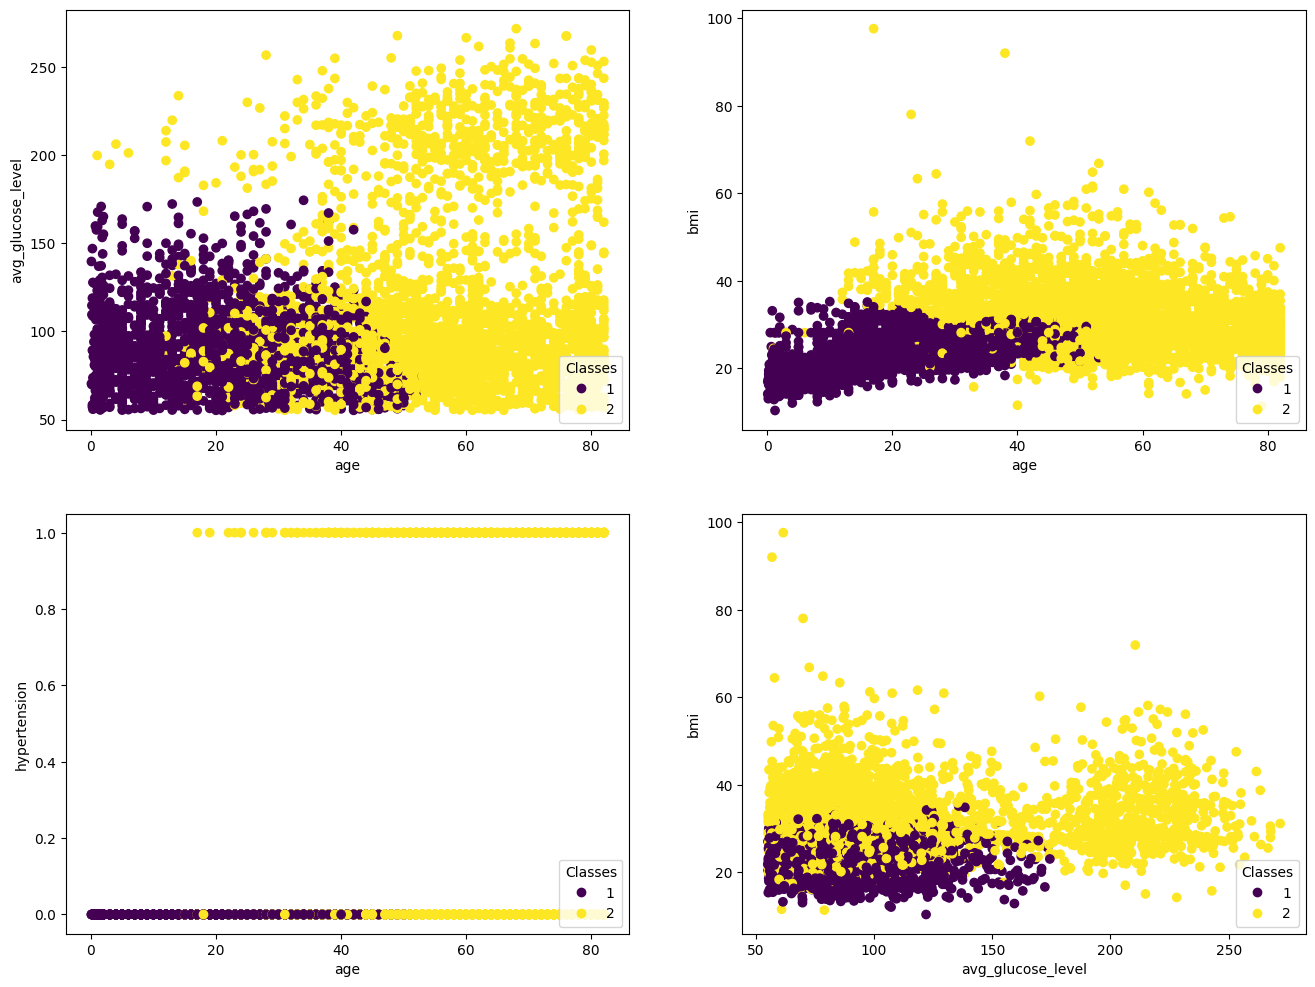

In [360]:
result = hierarchy.fcluster(linkage_matrix, 90, criterion="distance")
y_names = ['1', '2']

plt.figure(figsize=(16, 12))

draw_data_2d(df_reduced, 0, 1, result, y_names, plt.subplot(2, 2, 1))  # age vs avg_glucose_level
draw_data_2d(df_reduced, 0, 2, result, y_names, plt.subplot(2, 2, 2))  # age vs bmi
draw_data_2d(df_reduced, 0, 3, result, y_names, plt.subplot(2, 2, 3))  # age vs hypertension
draw_data_2d(df_reduced, 1, 2, result, y_names, plt.subplot(2, 2, 4))  # avg_glucose_level vs bmi

### KMeans (неиерархическая четкая кластеризация) для сравнения

In [361]:
from typing import Tuple

def print_cluster_result(
    df: pd.DataFrame, clusters_num: int, labels: np.ndarray, separator: str = ", "
):
    for cluster_id in range(clusters_num):
        cluster_indices = np.where(labels == cluster_id)[0]
        print(f"Cluster {cluster_id + 1} ({len(cluster_indices)}):")
        rules = [str(df.index[idx]) for idx in cluster_indices]
        print(separator.join(rules))
        print("")
        print("--------")


def run_kmeans(
    df: pd.DataFrame, num_clusters: int, random_state: int
) -> Tuple[np.ndarray, np.ndarray]:
    kmeans = cluster.KMeans(n_clusters=num_clusters, random_state=random_state)
    labels = kmeans.fit_predict(df)
    return labels, kmeans.cluster_centers_

In [362]:
random_state = 9

labels, centers = run_kmeans(df_scaled, 2, random_state) # также указываем 2 кластера
print_cluster_result(df_scaled, 2, labels)
display(centers)

Cluster 1 (2979):
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 

array([[ 0.6485448 ,  0.23763868,  0.4646737 ,  0.16123614],
       [-0.90516543, -0.33166917, -0.64853897,  0.00843882]])

Также визуализируем результаты:

In [363]:
def draw_cluster_results(
    df: pd.DataFrame,
    col1: int,
    col2: int,
    labels: np.ndarray,
    cluster_centers: np.ndarray,
    subplot: Any | None = None,
):
    ax = None
    if subplot is None:
        ax = plt
    else:
        ax = subplot

    centroids = cluster_centers
    u_labels = np.unique(labels)

    for i in u_labels:
        ax.scatter(
            df[labels == i][df.columns[col1]],
            df[labels == i][df.columns[col2]],
            label=i,
        )

    ax.scatter(centroids[:, col1], centroids[:, col2], s=80, color="k")

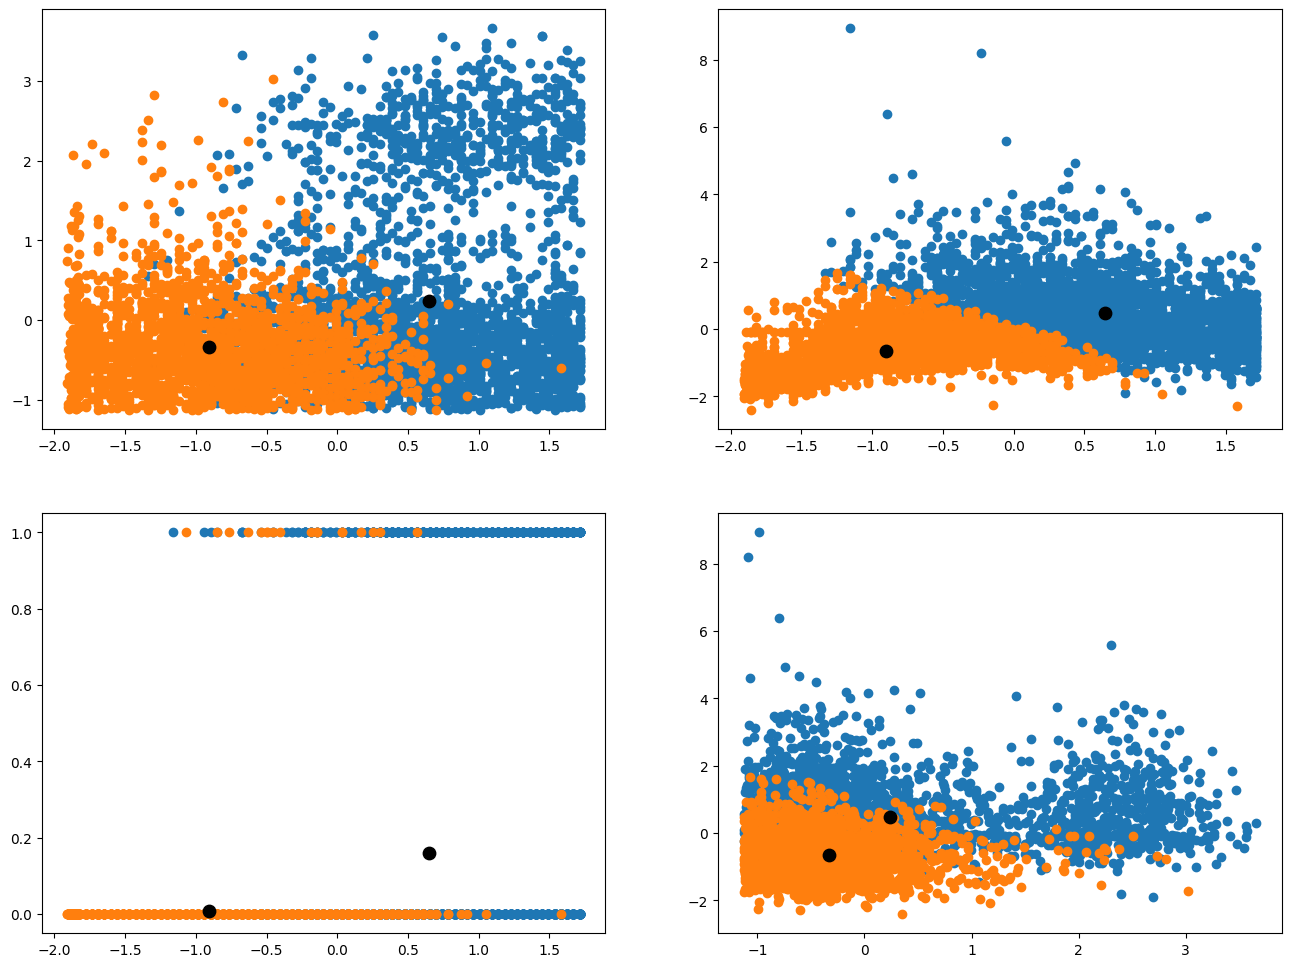

In [364]:
plt.figure(figsize=(16, 12))
draw_cluster_results(df_scaled, 0, 1, labels, centers, plt.subplot(2, 2, 1)) # age vs avg_glucose_level
draw_cluster_results(df_scaled, 0, 2, labels, centers, plt.subplot(2, 2, 2)) # age vs bmi
draw_cluster_results(df_scaled, 0, 3, labels, centers, plt.subplot(2, 2, 3)) # age vs hypertension
draw_cluster_results(df_scaled, 1, 2, labels, centers, plt.subplot(2, 2, 4)) # avg_glucose_level vs bmi

### Теперь понизим размерность данных до двух компонент и еще раз осуществим неиерархическую кластеризацию

In [365]:
from sklearn.decomposition import PCA

pca_data = PCA(n_components=2).fit_transform(df_scaled)
pca_data

array([[ 2.60768539,  1.53464701],
       [ 1.49992616,  1.6776011 ],
       [ 1.29355664, -0.53864765],
       ...,
       [-0.36264968, -0.48106455],
       [ 0.63114968,  1.26696549],
       [-0.42000577, -0.20709469]])

Визуализация данных после понижения размерности:

<Figure size 800x600 with 0 Axes>

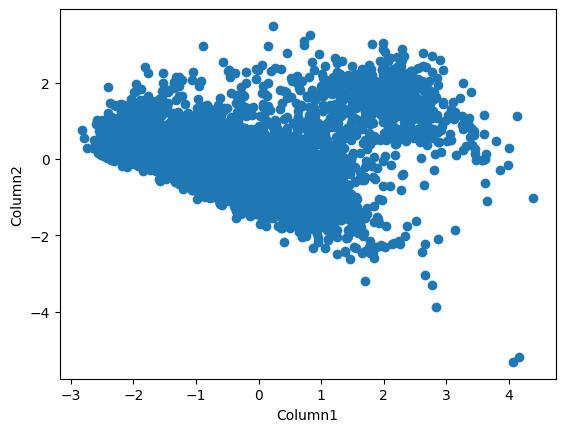

In [366]:
plt.figure(figsize=(8, 6))
draw_data_2d(
    pd.DataFrame({"Column1": pca_data[:, 0], "Column2": pca_data[:, 1]}),
    0,
    1
)

Визуализация результатов неиерархической кластеризации для двух кластеров с учетом понижения размерности:

In [367]:
from sklearn.cluster import KMeans

def fit_kmeans(
    reduced_data: np.ndarray, num_clusters: int, random_state: int
) -> cluster.KMeans:
    kmeans = cluster.KMeans(n_clusters=num_clusters, random_state=random_state)
    kmeans.fit(reduced_data)
    return kmeans

def draw_clusters(reduced_data: np.ndarray, kmeans: KMeans):
    h = 0.02

    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,  # type: ignore
        aspect="auto",
        origin="lower",
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        "K-means clustering (PCA-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

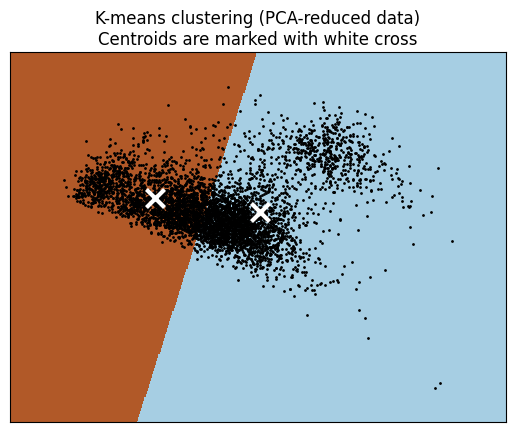

In [368]:
kmeans = fit_kmeans(pca_data, 2, random_state)
draw_clusters(pca_data, kmeans)

### Анализ оценки инерции для метода локтя (метод оценки суммы квадратов расстояний)

In [369]:
import math

def _get_kmeans_range(
    df: pd.DataFrame | np.ndarray, random_state: int
) -> Tuple[List, range]:
    max_clusters = int(math.sqrt(len(df)))
    clusters_range = range(2, max_clusters + 1)
    kmeans_per_k = [
        cluster.KMeans(n_clusters=k, random_state=random_state).fit(df)
        for k in clusters_range
    ]
    return kmeans_per_k, clusters_range

def get_clusters_inertia(df: pd.DataFrame, random_state: int) -> Tuple[List, range]:
    kmeans_per_k, clusters_range = _get_kmeans_range(df, random_state)
    return [model.inertia_ for model in kmeans_per_k], clusters_range

def _draw_cluster_scores(
    data: List,
    clusters_range: range,
    score_name: str,
    title: str,
):
    plt.figure(figsize=(8, 5))
    plt.plot(clusters_range, data, "bo-")
    plt.xlabel("$k$", fontsize=8)
    plt.ylabel(score_name, fontsize=8)
    plt.title(title)
    
def draw_elbow_diagram(inertias: List, clusters_range: range):
    _draw_cluster_scores(inertias, clusters_range, "Inertia", "The Elbow Diagram")

range(2, 72)

[10807.951785407908,
 7230.469448316978,
 5557.52543138914,
 4797.979759685805,
 4423.644627489069,
 4111.274040074362,
 3835.9107274654943,
 3470.5709394276055,
 3214.9508312393855,
 3055.948649061301,
 2917.4624294525993,
 2775.6958508684957,
 2666.7517424114767,
 2583.67129721405,
 2454.734133533792,
 2366.97034902638,
 2300.243540824471,
 2238.6558968087775,
 2198.859569168518,
 2105.264113236806,
 2047.1365550171872,
 1974.5089970560662,
 1929.7059701072799,
 1871.56533195742,
 1822.1024899611,
 1789.851518648345,
 1755.412423308707,
 1723.9872684190675,
 1667.5634523563954,
 1636.4369435503352,
 1608.6680809373954,
 1578.8323940677194,
 1552.8989367572233,
 1520.491137014789,
 1490.2403910960472,
 1472.1227947451098,
 1441.2470981595752,
 1420.0414881358802,
 1389.6252737600823,
 1367.3892464059263,
 1335.2873410440359,
 1318.5070068269697,
 1299.4557514619496,
 1279.04141250672,
 1269.4607342885668,
 1241.4829425893622,
 1236.9364320273746,
 1220.5757555830407,
 1199.47877218850

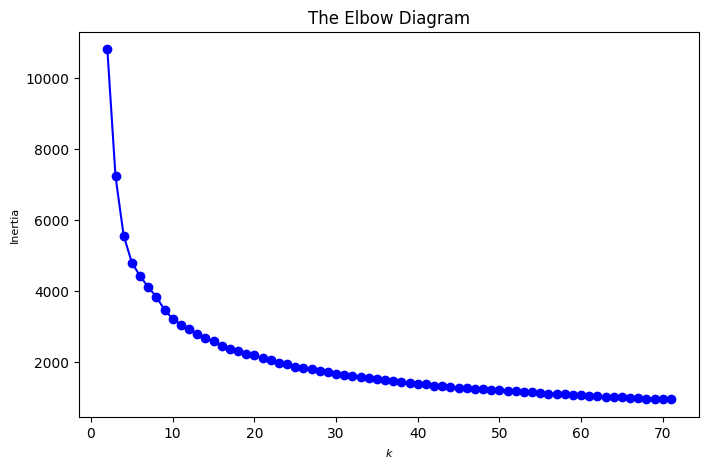

In [370]:
inertias, clusters_range = get_clusters_inertia(df_scaled, random_state)
display(clusters_range)
display(inertias)
draw_elbow_diagram(inertias, clusters_range)

На графике "Elbow Diagram" (метод локтя) оптимальное количество кластеров определяется точкой, где график начинает "сгибаться", то есть уменьшается прирост качества при добавлении новых кластеров (резкое снижение инерции становится более плавным).

На представленном выше варианте графика видно, что инерция резко падает от 2 до примерно 5 кластеров. После этого снижение инерции становится гораздо менее выраженным. Поэтому в этом случае не будет ошибкой выбрать число от 3 до 5, так как добавление большего количества кластеров уменьшает инерцию незначительно, что может не оправдывать усложнение модели.

Для выбранного же ранее варианта в 2 кластера (в процессе использования алгоритмов) инерция достаточно высокая, поэтому на таком значении, особенно если неизвестны особенности решаемой задачи, лучше не останавливаться. 

### Выбор количества кластеров на основе коэффициента силуэта

In [371]:
from sklearn.metrics import silhouette_score

def get_clusters_silhouette_scores(
    df: pd.DataFrame, random_state: int
) -> Tuple[List, range]:
    kmeans_per_k, clusters_range = _get_kmeans_range(df, random_state)
    return [
        float(silhouette_score(df, model.labels_)) for model in kmeans_per_k
    ], clusters_range

def draw_silhouettes_diagram(silhouette: List, clusters_range: range):
    _draw_cluster_scores(
        silhouette, clusters_range, "Silhouette score", "The Silhouette score"
    )

range(2, 72)

[0.29075853608405966,
 0.357346280582275,
 0.3580028147866339,
 0.3060072539613545,
 0.2778622088721048,
 0.28235647440325495,
 0.26298446011032567,
 0.2519432670192678,
 0.25796332430571123,
 0.2595321756963313,
 0.25189577317992934,
 0.25716821055171396,
 0.2520497680241438,
 0.24353440201890503,
 0.24991746284790578,
 0.24532156215695916,
 0.24200645508428598,
 0.2458836870128432,
 0.24107604337960176,
 0.2394901399609211,
 0.24132182121975873,
 0.24200391337627483,
 0.2406841380203819,
 0.2399078448492621,
 0.24412970613974297,
 0.23836956197419176,
 0.2362035088131641,
 0.23661921022263044,
 0.23692749271772362,
 0.23000948461224915,
 0.23066661229530314,
 0.22745627516202846,
 0.23140639929847473,
 0.23210518261226853,
 0.23116884290692077,
 0.23097360362311076,
 0.23655235029308458,
 0.23544438069925508,
 0.23735392388178586,
 0.23905299077276798,
 0.24235545959509608,
 0.2406902608674703,
 0.239164952448719,
 0.24153292277088986,
 0.23730838097862156,
 0.23622612255542497,
 0.2

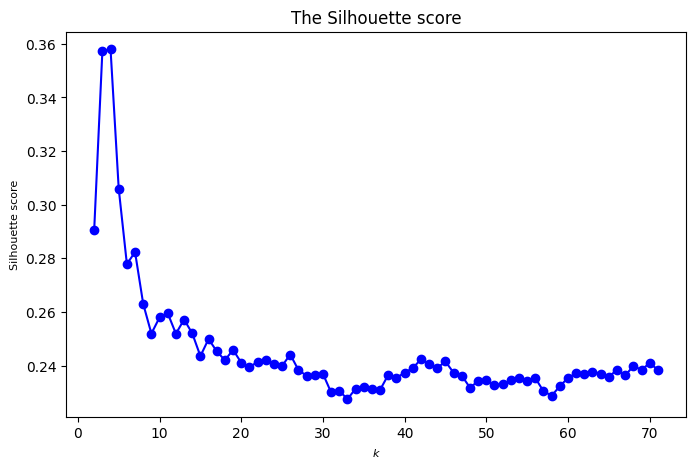

In [372]:
silhouette_scores, clusters_range = get_clusters_silhouette_scores(df_scaled, random_state)
display(clusters_range)
display(silhouette_scores)
draw_silhouettes_diagram(silhouette_scores, clusters_range)

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (а) и среднего расстояния до ближайшего кластера (b) для каждого образца. Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру.

На графике коэффициента силуэта оптимальное количество кластеров определяется пиком, где значение силуэта максимально, т.к. чем выше значение, тем лучше структура кластеров.

В данном случае из графика и предыдущего вывода списка оценок видно, что максимальное значение коэффициента силуэта наблюдается при 3 или 4 кластерах (около 0.36). Это говорит о том, что при таком количестве кластеров группы имеют наилучшее качество разделения.

Однако, если для задачи требуется большее количество кластеров, можно выбрать другое значение, где коэффициент силуэта все еще достаточно высокий (по сравнению с остальными вариантами). К примеру значения 5 или 7.

Для выбранного ранее варианта разделения на 2 кластера значение коэффициента силуэта равно примерно 0.2908, что указывает на то, что кластеры имеют нечеткую границу, а разделение данных является неоптимальным. Это может быть связано либо с недостаточным количеством кластеров, либо с особенностями самих данных, которые затрудняют их разделение на четко определенные группы.

### Пример анализа силуэтов для разбиения от 2 до 12 кластеров

In [373]:
from typing import Dict
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def get_clusters_silhouettes(df: np.ndarray, random_state: int) -> Dict:
    kmeans_per_k, _ = _get_kmeans_range(df, random_state)
    clusters_silhouettes: Dict = {}
    for model in kmeans_per_k:
        silhouette_value = silhouette_score(df, model.labels_)
        sample_silhouette_values = silhouette_samples(df, model.labels_)
        clusters_silhouettes[model.n_clusters] = (
            silhouette_value,
            sample_silhouette_values,
            model,
        )
    return clusters_silhouettes

def _draw_silhouette(
    ax: Any,
    reduced_data: np.ndarray,
    n_clusters: int,
    silhouette_avg: float,
    sample_silhouette_values: List,
    cluster_labels: List,
):
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)  # type: ignore
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


def _draw_cluster_data(
    ax: Any,
    reduced_data: np.ndarray,
    n_clusters: int,
    cluster_labels: np.ndarray,
    cluster_centers: np.ndarray,
):
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)  # type: ignore
    ax.scatter(
        reduced_data[:, 0],
        reduced_data[:, 1],
        marker=".",
        s=30,
        lw=0,
        alpha=0.7,
        c=colors,
        edgecolor="k",
    )

    ax.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(cluster_centers):
        ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

def draw_silhouettes(reduced_data: np.ndarray, silhouettes: Dict):
    for key, value in silhouettes.items():
        if key > 12:
            return 
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        n_clusters = key
        silhouette_avg = value[0]
        sample_silhouette_values = value[1]
        cluster_labels = value[2].labels_
        cluster_centers = value[2].cluster_centers_

        _draw_silhouette(
            ax1,
            reduced_data,
            n_clusters,
            silhouette_avg,
            sample_silhouette_values,
            cluster_labels,
        )

        _draw_cluster_data(
            ax2,
            reduced_data,
            n_clusters,
            cluster_labels,
            cluster_centers,
        )

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

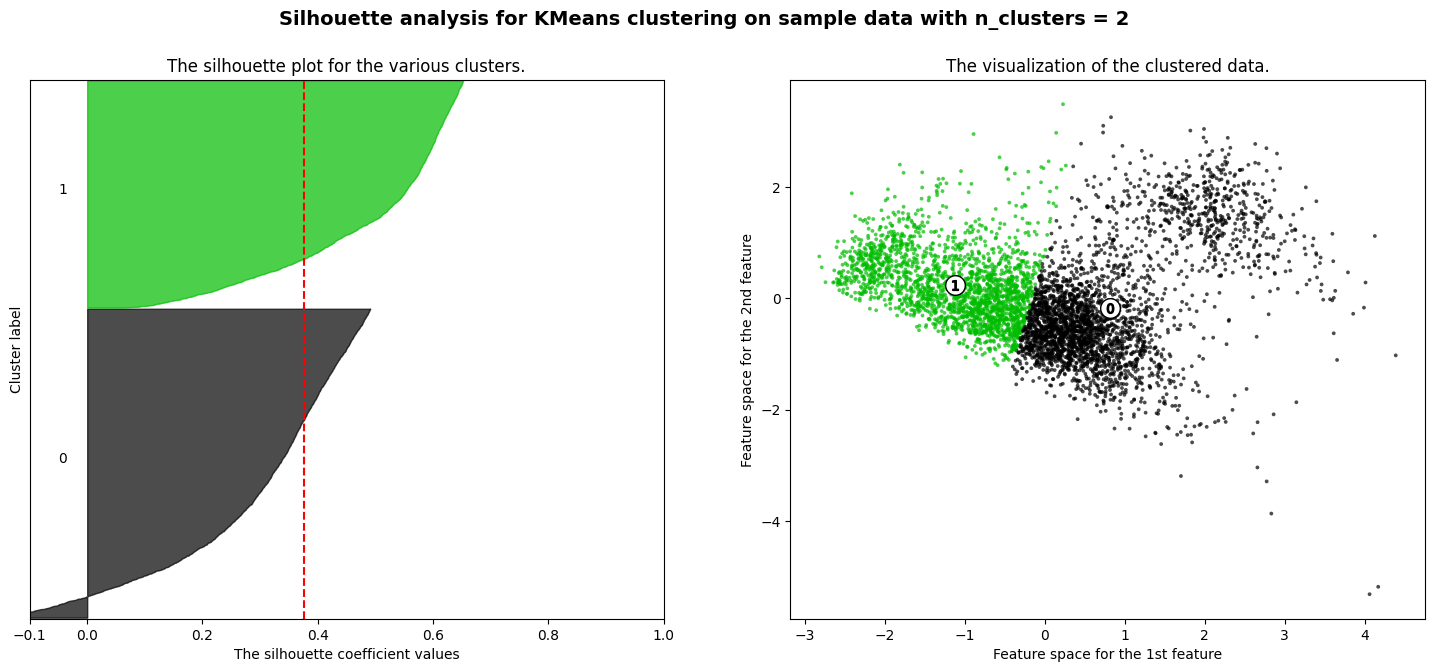

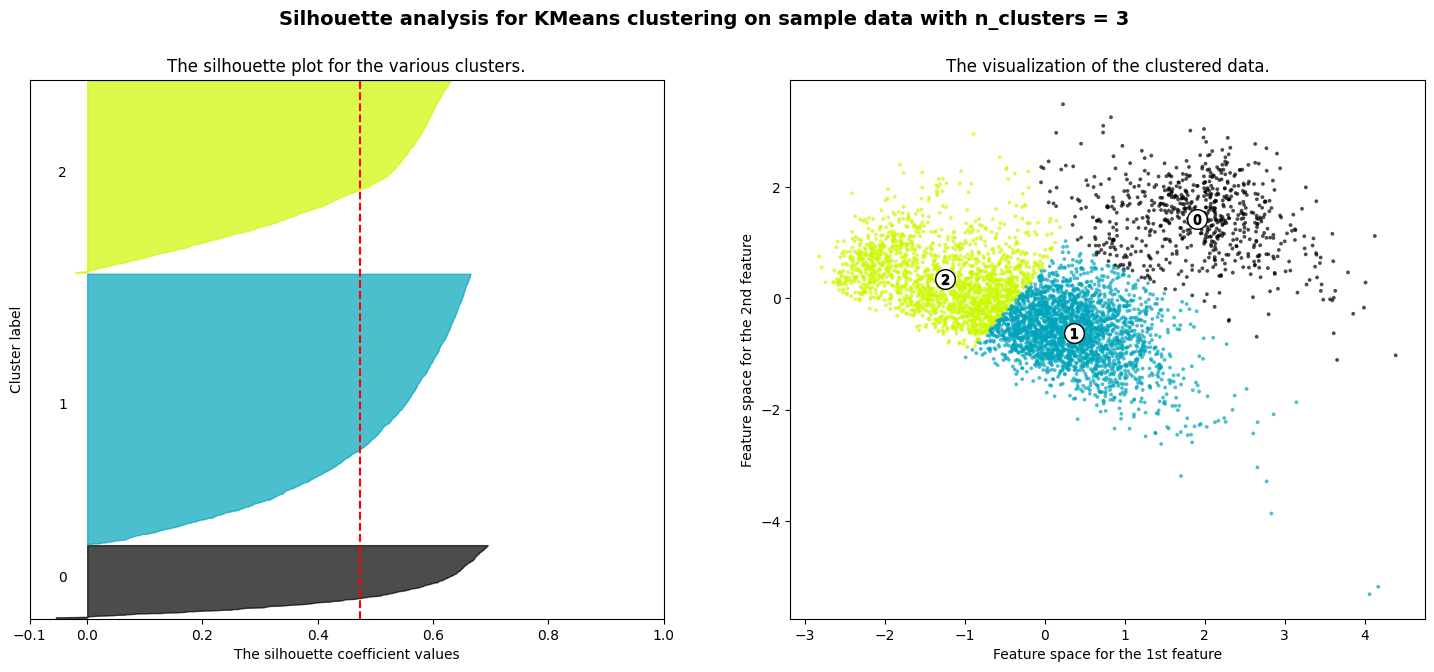

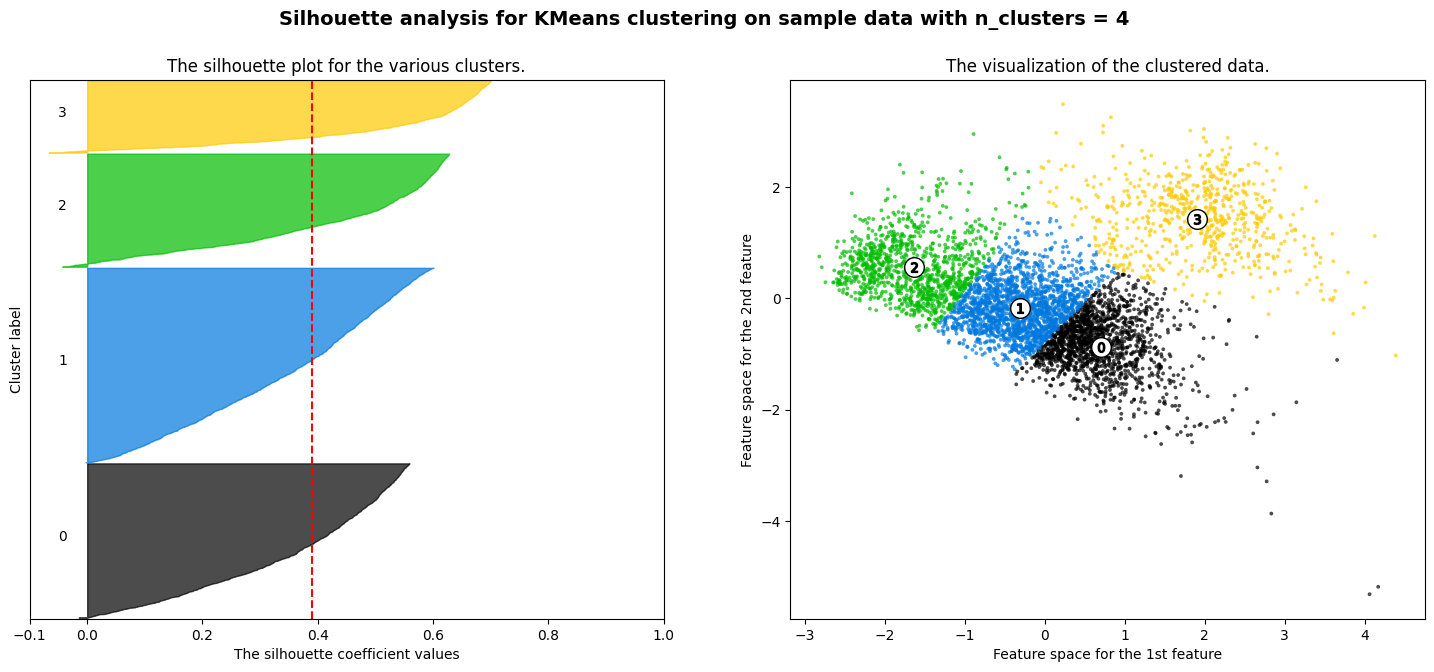

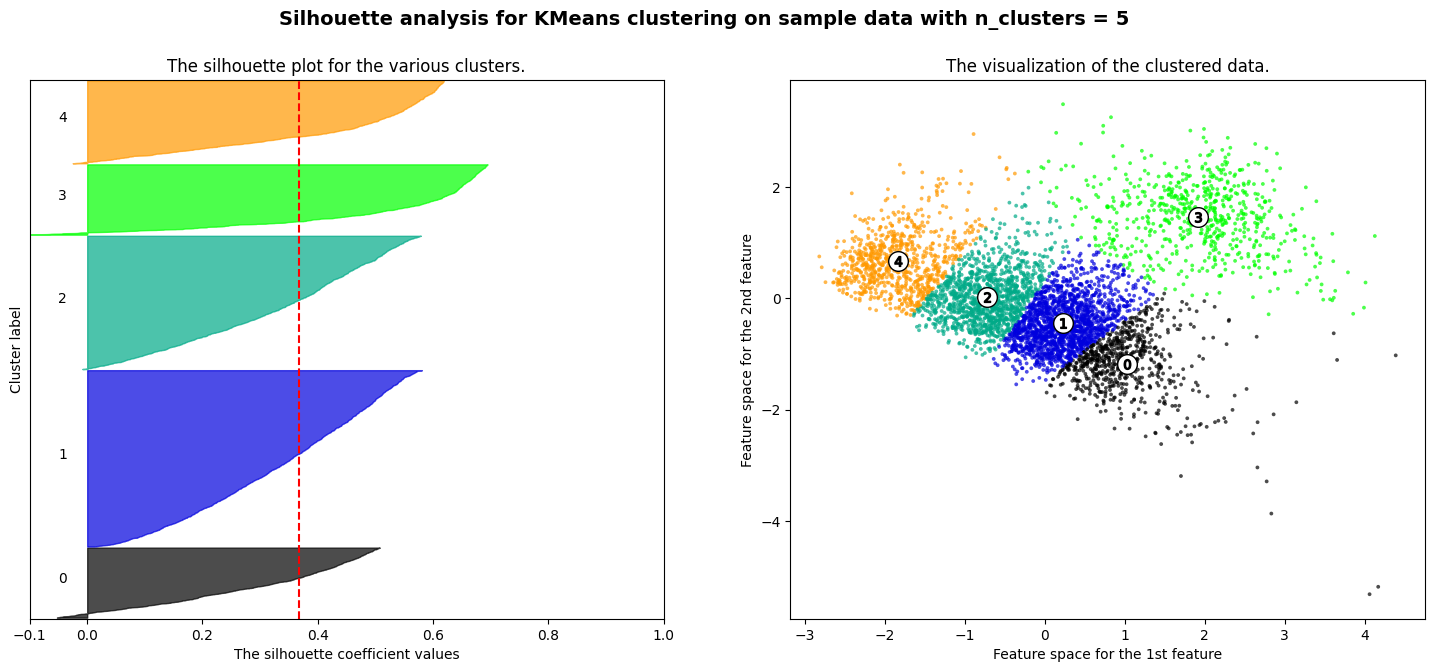

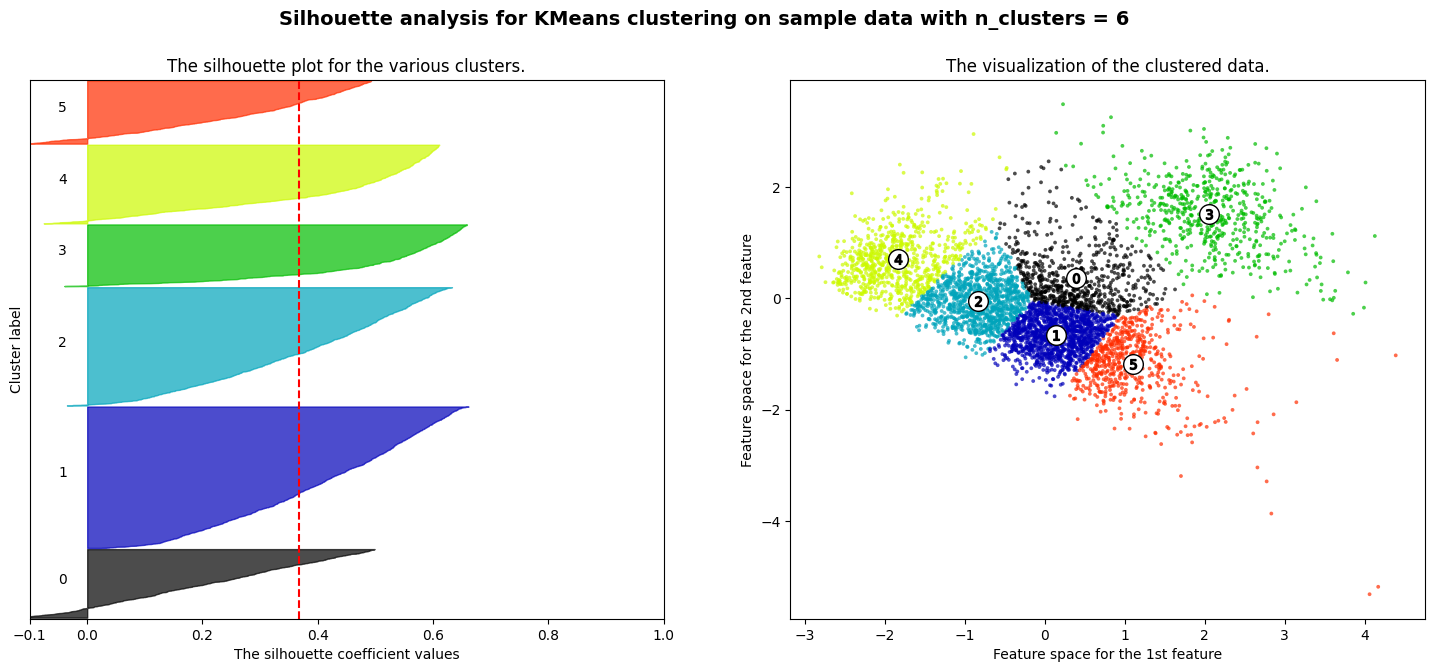

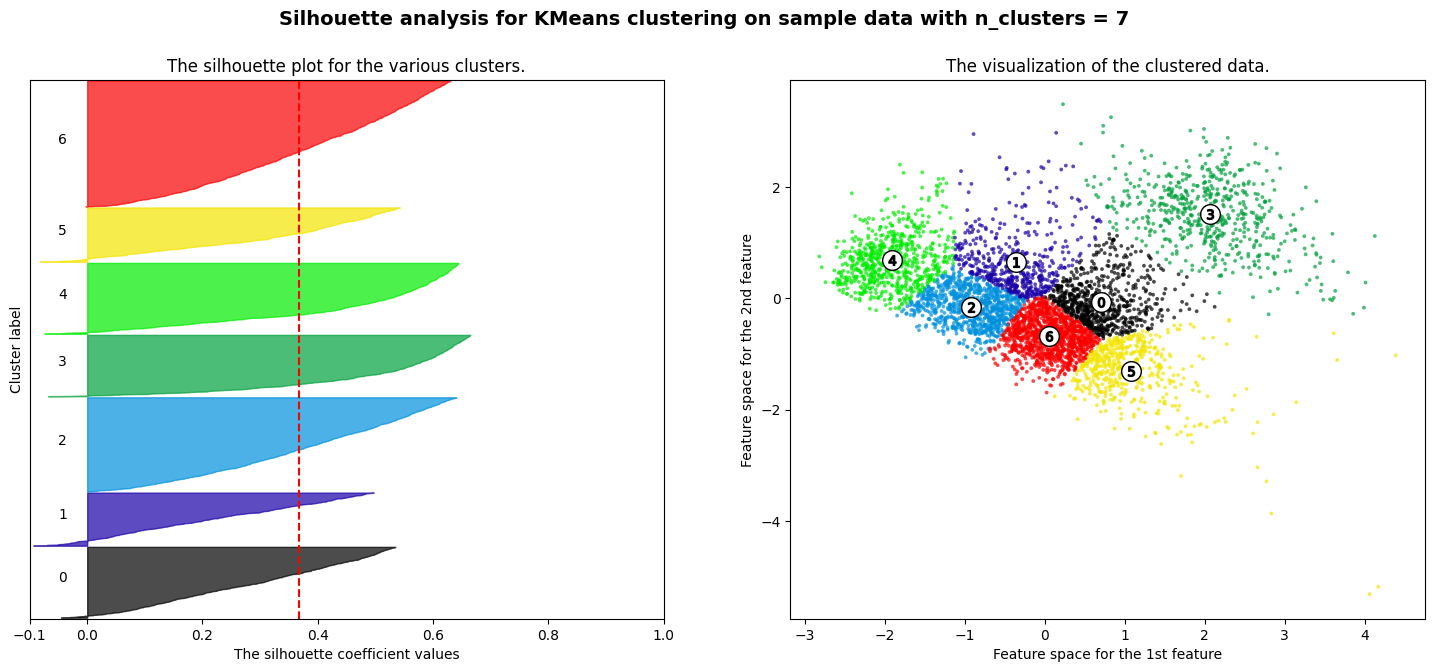

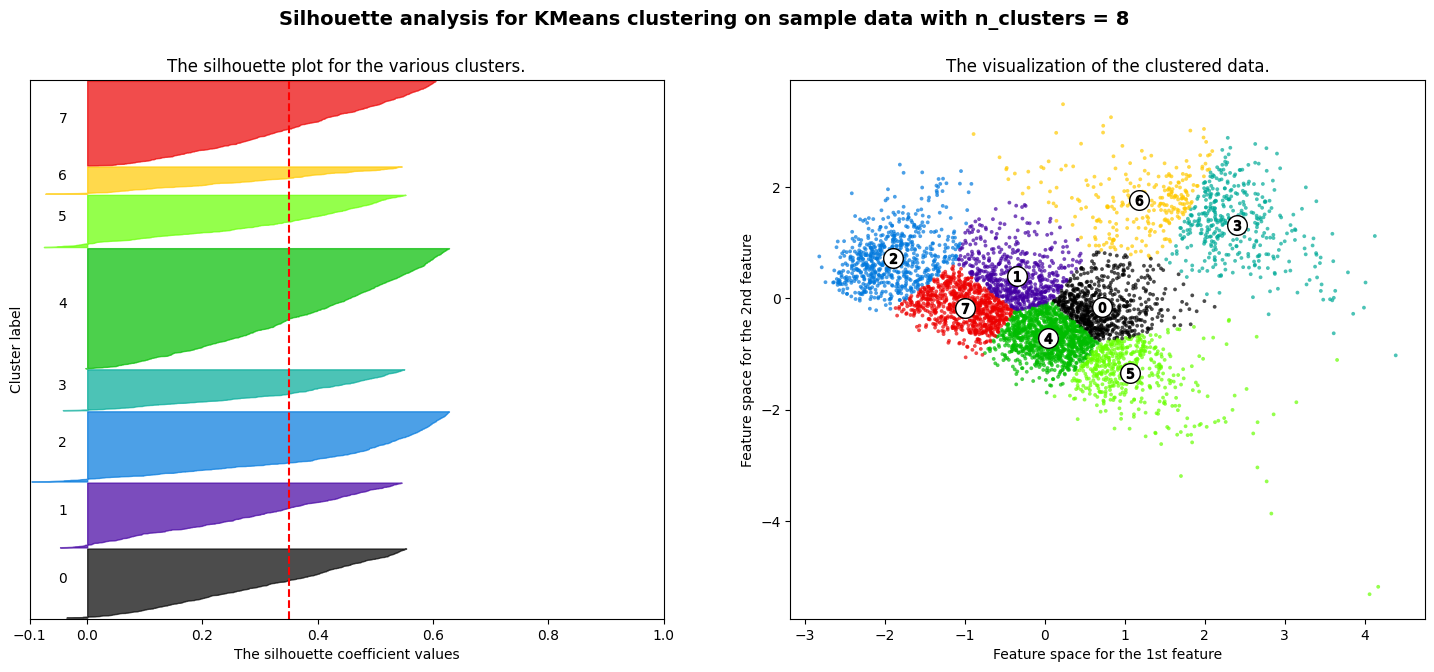

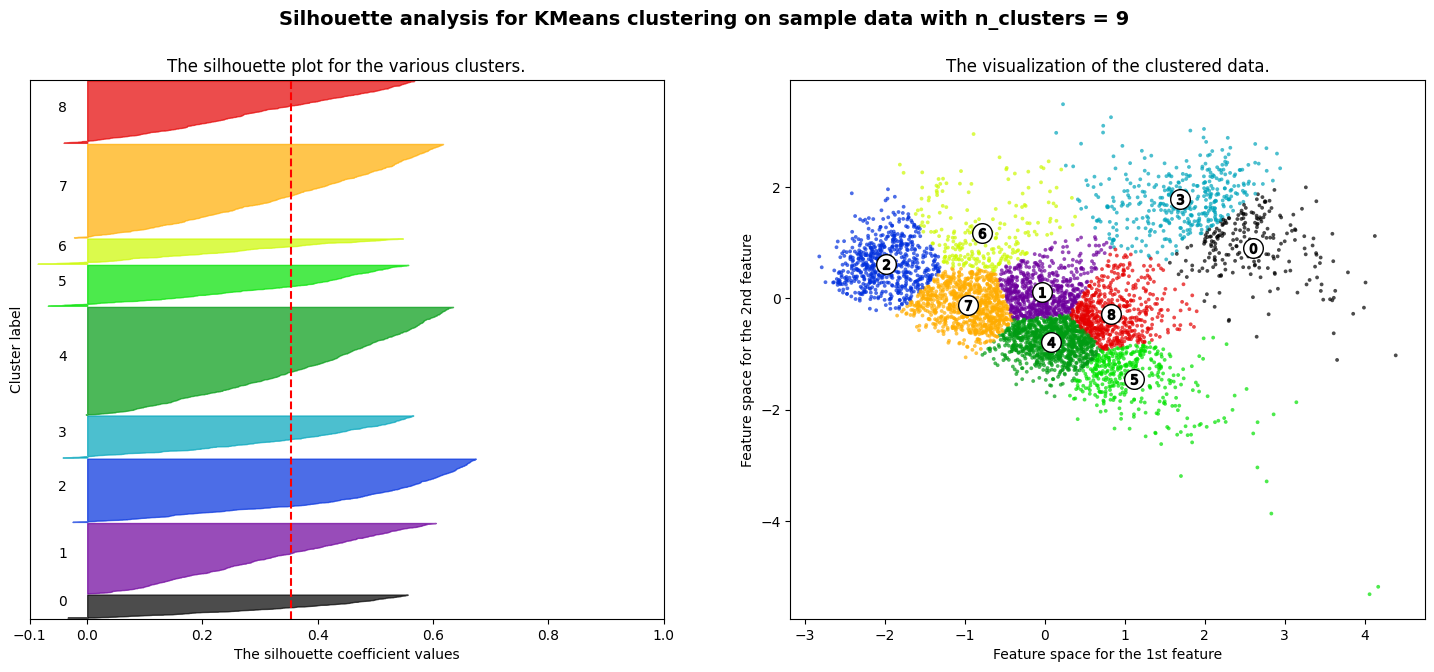

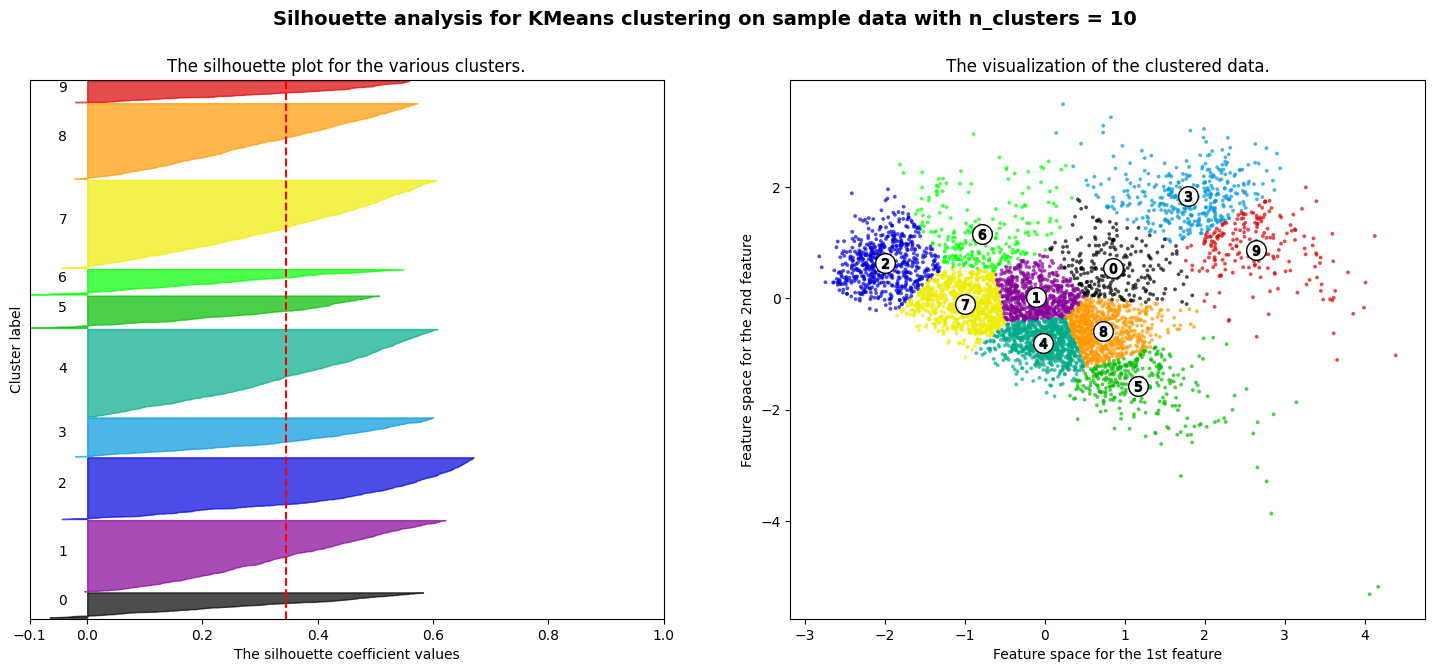

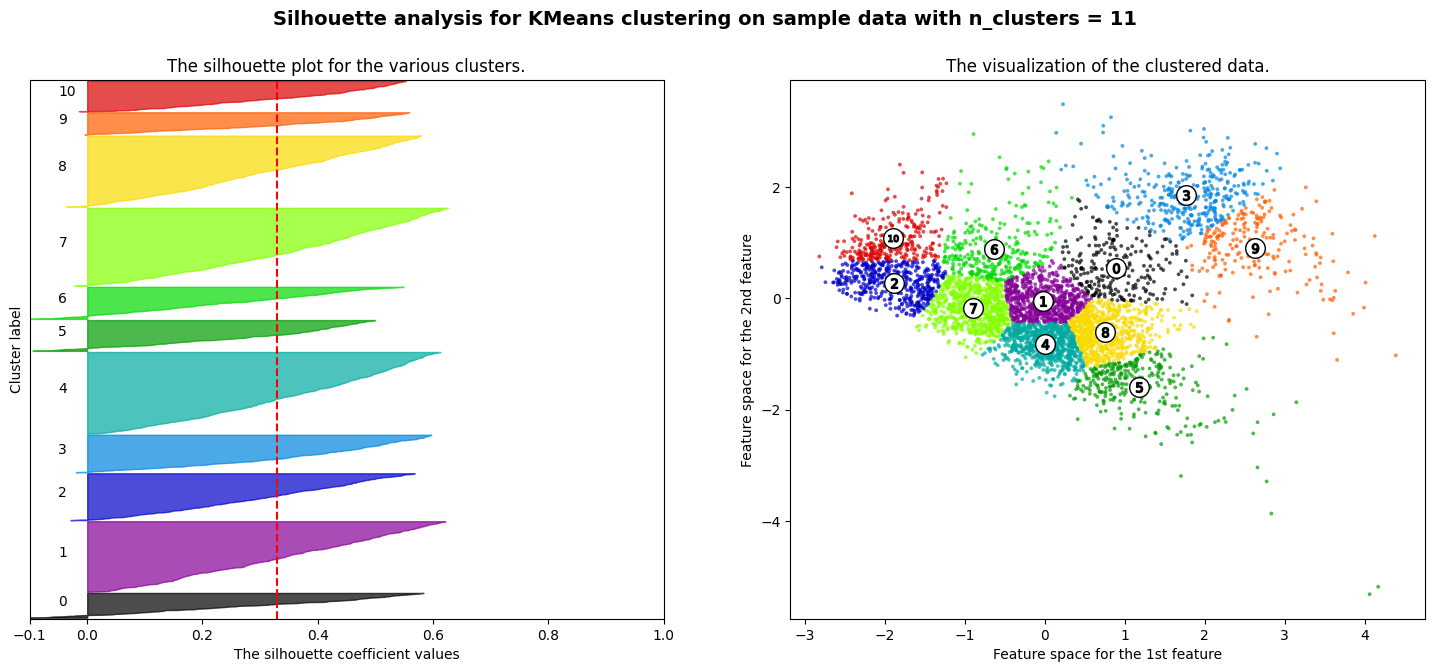

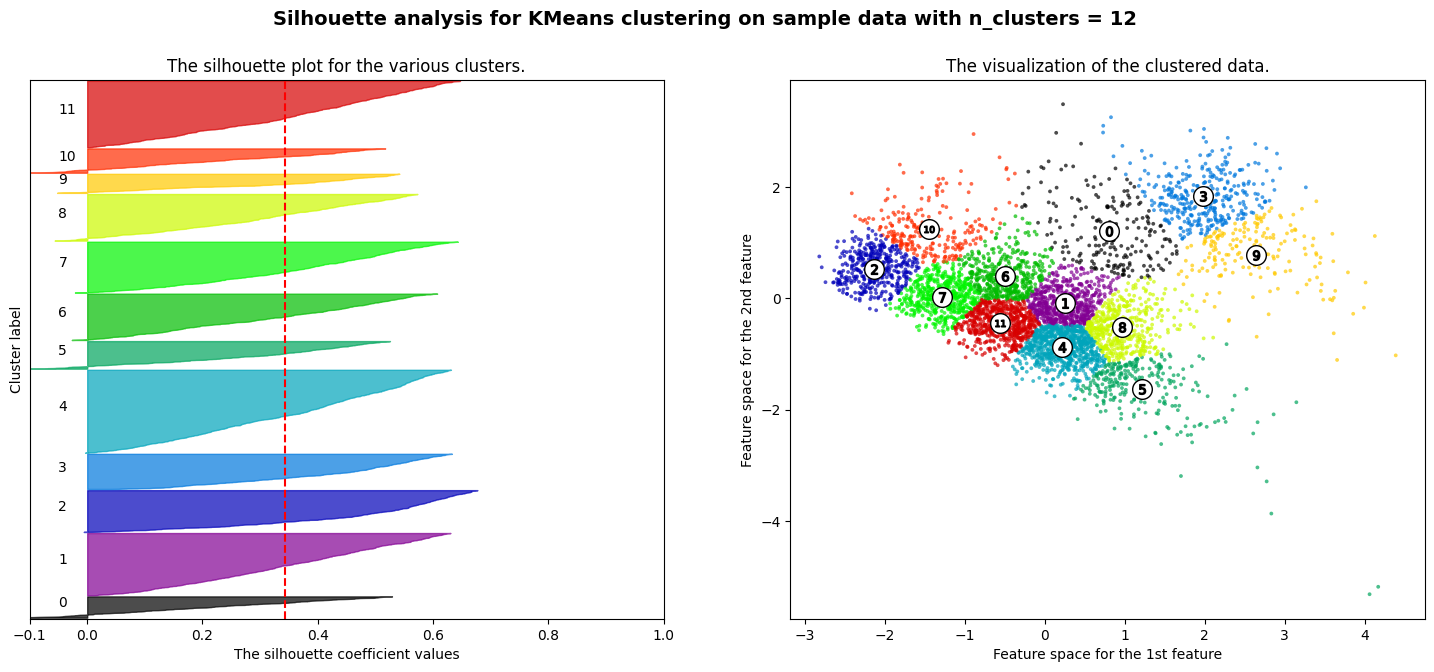

In [374]:
silhouettes = get_clusters_silhouettes(pca_data, random_state)
draw_silhouettes(pca_data, silhouettes)